<a href="https://www.kaggle.com/code/lalit7881/impact-of-gaming-on-mental-health?scriptVersionId=298846879" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import plotly.io as pio
pio.renderers.default = "notebook_connected"

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestRegressor

import warnings
warnings.filterwarnings("ignore")

plt.style.use("ggplot")

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/gaming-and-mental-health/gaming_mental_health_10M_40features.csv


## Import dataset

In [2]:
df = pd.read_csv("/kaggle/input/gaming-and-mental-health/gaming_mental_health_10M_40features.csv")

In [3]:
df.head()

,age,gender,income,daily_gaming_hours,weekly_sessions,years_gaming,sleep_hours,caffeine_intake,exercise_hours,stress_level,...,parental_supervision,loneliness_score,aggression_score,happiness_score,bmi,screen_time_total,eye_strain_score,back_pain_score,competitive_rank,internet_quality
0,51,Female,8615,3.68,22,17,5.26,1.00,0.18,3,...,0,2.87,3.19,5.20,19.69,4.71,5.71,4.81,80,10
1,41,Female,39453,5.70,34,16,9.20,0.70,1.44,8,...,7,4.17,7.73,5.40,26.37,6.62,6.77,3.99,57,2
2,27,Male,40466,1.58,8,22,7.39,2.24,3.15,3,...,9,9.38,2.85,5.17,25.15,9.30,2.16,4.75,59,10
3,55,Male,51076,6.11,39,24,7.99,1.65,2.80,1,...,5,8.24,7.19,8.62,26.42,13.81,4.72,5.37,89,1
4,20,Male,86116,3.65,17,0,7.12,1.02,1.01,2,...,9,6.65,2.53,9.71,25.75,10.74,3.90,6.44,15,10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   age                         1000000 non-null  int64  
 1   gender                      1000000 non-null  object 
 2   income                      1000000 non-null  int64  
 3   daily_gaming_hours          1000000 non-null  float64
 4   weekly_sessions             1000000 non-null  int64  
 5   years_gaming                1000000 non-null  int64  
 6   sleep_hours                 1000000 non-null  float64
 7   caffeine_intake             1000000 non-null  float64
 8   exercise_hours              1000000 non-null  float64
 9   stress_level                1000000 non-null  int64  
 10  anxiety_score               1000000 non-null  float64
 11  depression_score            1000000 non-null  float64
 12  social_interaction_score    1000000 non-null  float64
 13

In [5]:
df.describe()

,age,income,daily_gaming_hours,weekly_sessions,years_gaming,sleep_hours,caffeine_intake,exercise_hours,stress_level,anxiety_score,...,parental_supervision,loneliness_score,aggression_score,happiness_score,bmi,screen_time_total,eye_strain_score,back_pain_score,competitive_rank,internet_quality
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.00000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,...,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,35.986005,77497.675955,3.999255,19.997540,12.002512,7.00053,1.997513,1.999008,5.497577,4.998644,...,4.996374,4.998520,5.000455,5.981822,24.003916,8.002032,4.998675,4.018777,49.448122,5.503339
std,13.557163,41851.540503,2.826307,11.253438,7.207838,1.50111,1.996174,1.999545,2.873248,1.977711,...,3.160810,1.977601,1.980307,1.956122,3.999927,3.998987,1.979308,1.956123,28.873153,2.871940
min,13.000000,5000.000000,0.000000,1.000000,0.000000,-0.17000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,4.450000,0.070000,0.000000,0.000000,0.000000,1.000000
25%,24.000000,41258.000000,1.920000,10.000000,6.000000,5.99000,0.580000,0.580000,3.000000,3.650000,...,2.000000,3.650000,3.650000,4.650000,21.300000,5.070000,3.650000,2.660000,24.000000,3.000000
50%,36.000000,77521.000000,3.360000,20.000000,12.000000,7.00000,1.390000,1.390000,5.000000,5.000000,...,5.000000,5.000000,5.000000,6.000000,24.000000,7.350000,5.000000,4.000000,49.000000,6.000000
75%,48.000000,113697.000000,5.380000,30.000000,18.000000,8.01000,2.770000,2.770000,8.000000,6.350000,...,8.000000,6.350000,6.350000,7.350000,26.700000,10.220000,6.350000,5.350000,74.000000,8.000000
max,59.000000,149999.000000,30.420000,39.000000,24.000000,14.02000,26.900000,26.480000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,43.600000,46.600000,10.000000,10.000000,99.000000,10.000000


In [6]:
df.isnull().sum()

age                           0
gender                        0
income                        0
daily_gaming_hours            0
weekly_sessions               0
years_gaming                  0
sleep_hours                   0
caffeine_intake               0
exercise_hours                0
stress_level                  0
anxiety_score                 0
depression_score              0
social_interaction_score      0
relationship_satisfaction     0
academic_performance          0
work_productivity             0
addiction_level               0
multiplayer_ratio             0
toxic_exposure                0
violent_games_ratio           0
mobile_gaming_ratio           0
night_gaming_ratio            0
weekend_gaming_hours          0
friends_gaming_count          0
online_friends                0
streaming_hours               0
esports_interest              0
headset_usage                 0
microtransactions_spending    0
parental_supervision          0
loneliness_score              0
aggressi

In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.dtypes

age                             int64
gender                         object
income                          int64
daily_gaming_hours            float64
weekly_sessions                 int64
years_gaming                    int64
sleep_hours                   float64
caffeine_intake               float64
exercise_hours                float64
stress_level                    int64
anxiety_score                 float64
depression_score              float64
social_interaction_score      float64
relationship_satisfaction     float64
academic_performance          float64
work_productivity             float64
addiction_level               float64
multiplayer_ratio             float64
toxic_exposure                float64
violent_games_ratio           float64
mobile_gaming_ratio           float64
night_gaming_ratio            float64
weekend_gaming_hours          float64
friends_gaming_count            int64
online_friends                  int64
streaming_hours               float64
esports_inte

In [9]:
df.shape

(1000000, 39)

In [10]:
df.nunique()

age                               47
gender                             3
income                        144856
daily_gaming_hours              2287
weekly_sessions                   39
years_gaming                      25
sleep_hours                     1236
caffeine_intake                 1820
exercise_hours                  1821
stress_level                      10
anxiety_score                   1001
depression_score                1001
social_interaction_score        1001
relationship_satisfaction       1001
academic_performance            8246
work_productivity               8239
addiction_level                 1001
multiplayer_ratio                101
toxic_exposure                    96
violent_games_ratio              100
mobile_gaming_ratio              101
night_gaming_ratio               101
weekend_gaming_hours            3316
friends_gaming_count              50
online_friends                   500
streaming_hours                 1229
esports_interest                  11
h

In [11]:
df.columns

Index(['age', 'gender', 'income', 'daily_gaming_hours', 'weekly_sessions',
       'years_gaming', 'sleep_hours', 'caffeine_intake', 'exercise_hours',
       'stress_level', 'anxiety_score', 'depression_score',
       'social_interaction_score', 'relationship_satisfaction',
       'academic_performance', 'work_productivity', 'addiction_level',
       'multiplayer_ratio', 'toxic_exposure', 'violent_games_ratio',
       'mobile_gaming_ratio', 'night_gaming_ratio', 'weekend_gaming_hours',
       'friends_gaming_count', 'online_friends', 'streaming_hours',
       'esports_interest', 'headset_usage', 'microtransactions_spending',
       'parental_supervision', 'loneliness_score', 'aggression_score',
       'happiness_score', 'bmi', 'screen_time_total', 'eye_strain_score',
       'back_pain_score', 'competitive_rank', 'internet_quality'],
      dtype='object')

In [12]:
for col in df.select_dtypes(include=['float64']).columns:
    df[col] = df[col].astype('float32')

for col in df.select_dtypes(include=['int64']).columns:
    df[col] = df[col].astype('int32')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 39 columns):
 #   Column                      Non-Null Count    Dtype  
---  ------                      --------------    -----  
 0   age                         1000000 non-null  int32  
 1   gender                      1000000 non-null  object 
 2   income                      1000000 non-null  int32  
 3   daily_gaming_hours          1000000 non-null  float32
 4   weekly_sessions             1000000 non-null  int32  
 5   years_gaming                1000000 non-null  int32  
 6   sleep_hours                 1000000 non-null  float32
 7   caffeine_intake             1000000 non-null  float32
 8   exercise_hours              1000000 non-null  float32
 9   stress_level                1000000 non-null  int32  
 10  anxiety_score               1000000 non-null  float32
 11  depression_score            1000000 non-null  float32
 12  social_interaction_score    1000000 non-null  float32
 13

## EDA

In [13]:
from pandas.plotting import parallel_coordinates
from mpl_toolkits.mplot3d import Axes3D
from math import pi


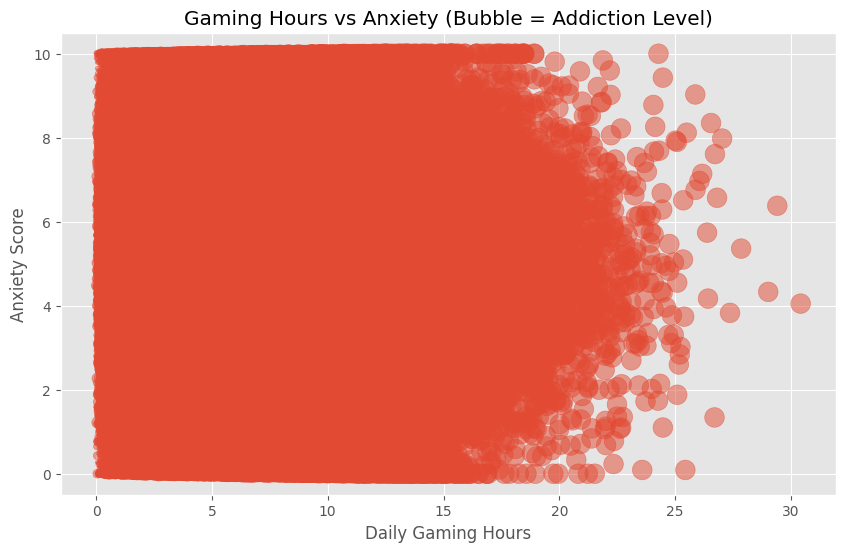

In [14]:
plt.figure(figsize=(10,6))
sizes = df['addiction_level'] * 20

plt.scatter(df['daily_gaming_hours'], df['anxiety_score'], 
            s=sizes, alpha=0.5)

plt.xlabel("Daily Gaming Hours")
plt.ylabel("Anxiety Score")
plt.title("Gaming Hours vs Anxiety (Bubble = Addiction Level)")
plt.show()

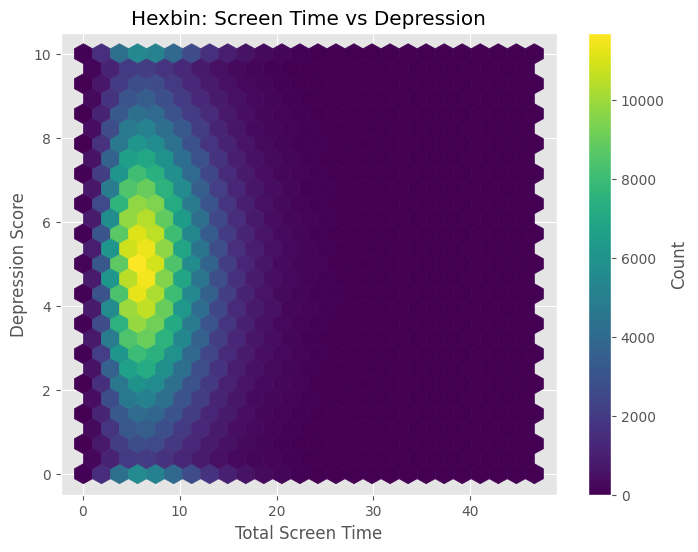

In [15]:
plt.figure(figsize=(8,6))
plt.hexbin(df['screen_time_total'], df['depression_score'], gridsize=25)
plt.colorbar(label='Count')
plt.xlabel("Total Screen Time")
plt.ylabel("Depression Score")
plt.title("Hexbin: Screen Time vs Depression")
plt.show()

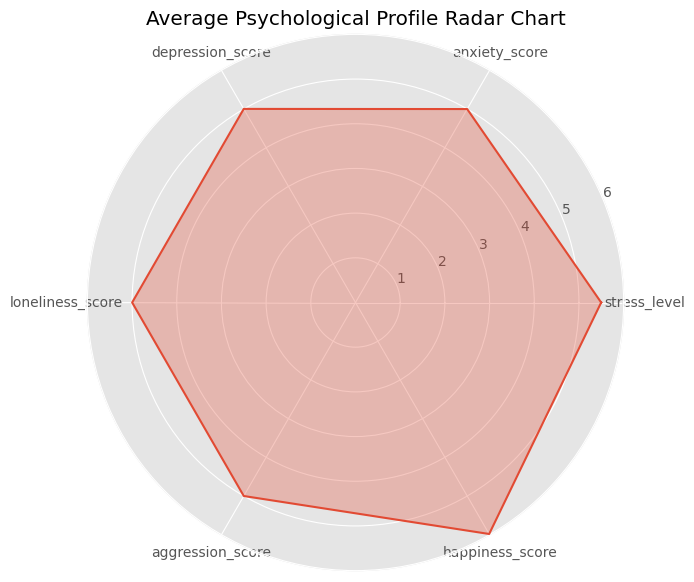

In [16]:
features = ['stress_level','anxiety_score','depression_score',
            'loneliness_score','aggression_score','happiness_score']

values = df[features].mean().values.tolist()
values += values[:1]

angles = [n / float(len(features)) * 2 * pi for n in range(len(features))]
angles += angles[:1]

plt.figure(figsize=(7,7))
ax = plt.subplot(111, polar=True)
plt.xticks(angles[:-1], features)
ax.plot(angles, values)
ax.fill(angles, values, alpha=0.3)

plt.title("Average Psychological Profile Radar Chart")
plt.show()

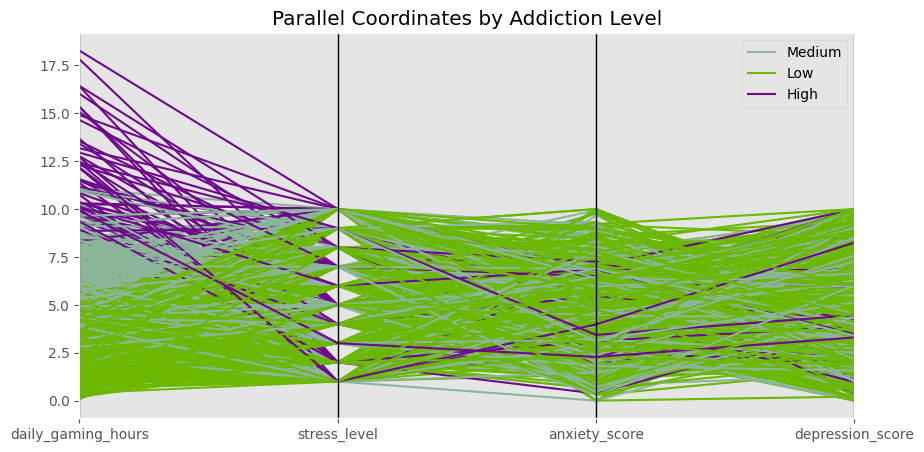

In [17]:
from pandas.plotting import parallel_coordinates

# Take only 1000 rows (or less)
sample = df[['daily_gaming_hours','stress_level','anxiety_score',
             'depression_score','addiction_level']].sample(1000, random_state=42).copy()

# Convert addiction_level to categorical
sample['addiction_level'] = pd.cut(
    sample['addiction_level'], 
    bins=3, 
    labels=['Low','Medium','High']
)

plt.figure(figsize=(10,5))
parallel_coordinates(sample, 'addiction_level')
plt.title("Parallel Coordinates by Addiction Level")
plt.show()

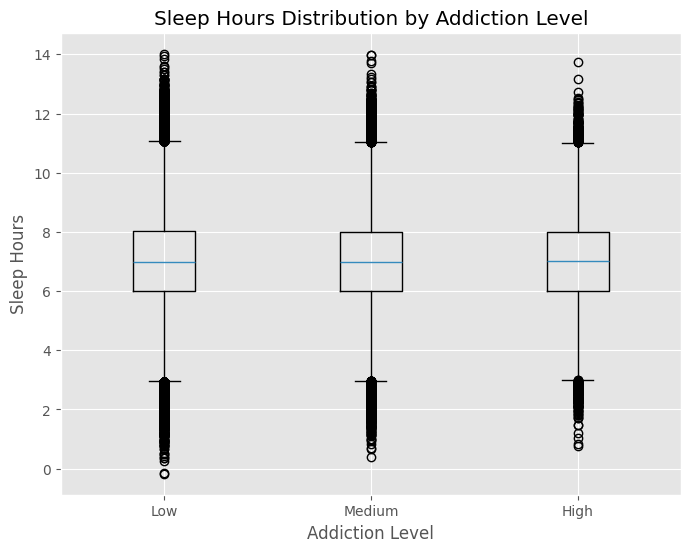

In [18]:
df['addiction_category'] = pd.cut(df['addiction_level'], 
                                  bins=3, labels=['Low','Medium','High'])

groups = df.groupby('addiction_category')['sleep_hours'].apply(list)

plt.figure(figsize=(8,6))
plt.boxplot(groups, labels=groups.index)
plt.xlabel("Addiction Level")
plt.ylabel("Sleep Hours")
plt.title("Sleep Hours Distribution by Addiction Level")
plt.show()

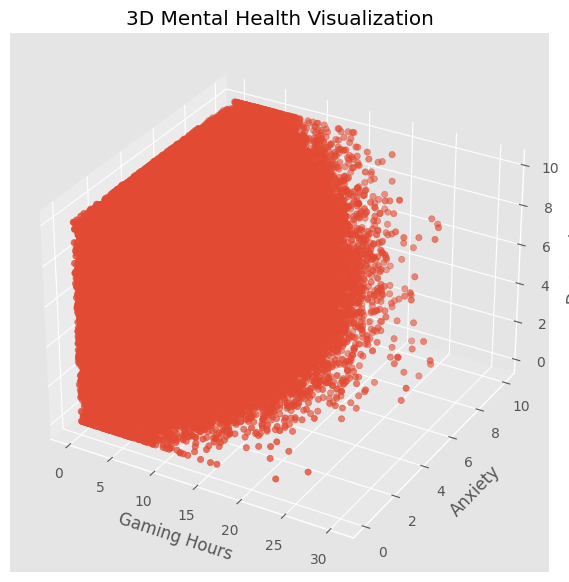

In [19]:
fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['daily_gaming_hours'],
           df['anxiety_score'],
           df['depression_score'])

ax.set_xlabel('Gaming Hours')
ax.set_ylabel('Anxiety')
ax.set_zlabel('Depression')
plt.title("3D Mental Health Visualization")
plt.show()

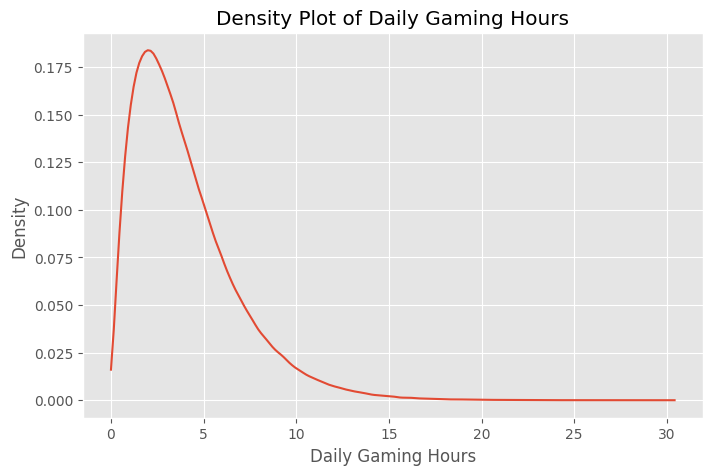

In [20]:
from scipy.stats import gaussian_kde

data = df['daily_gaming_hours']
density = gaussian_kde(data)
xs = np.linspace(data.min(), data.max(), 200)

plt.figure(figsize=(8,5))
plt.plot(xs, density(xs))
plt.title("Density Plot of Daily Gaming Hours")
plt.xlabel("Daily Gaming Hours")
plt.ylabel("Density")
plt.show()

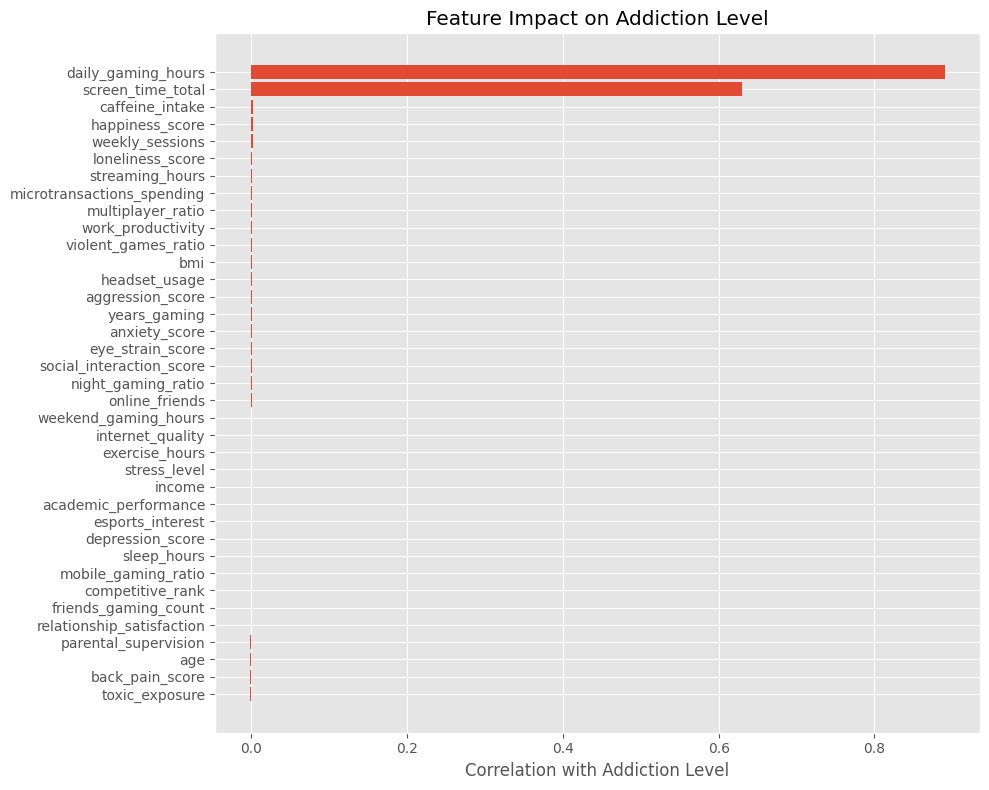

In [21]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=np.number)

# Compute correlation
correlations = numeric_df.corr()['addiction_level'].sort_values(ascending=False)

# Remove self-correlation (always 1.0)
correlations = correlations.drop('addiction_level')

plt.figure(figsize=(10,8))
plt.barh(correlations.index, correlations.values)
plt.xlabel("Correlation with Addiction Level")
plt.title("Feature Impact on Addiction Level")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

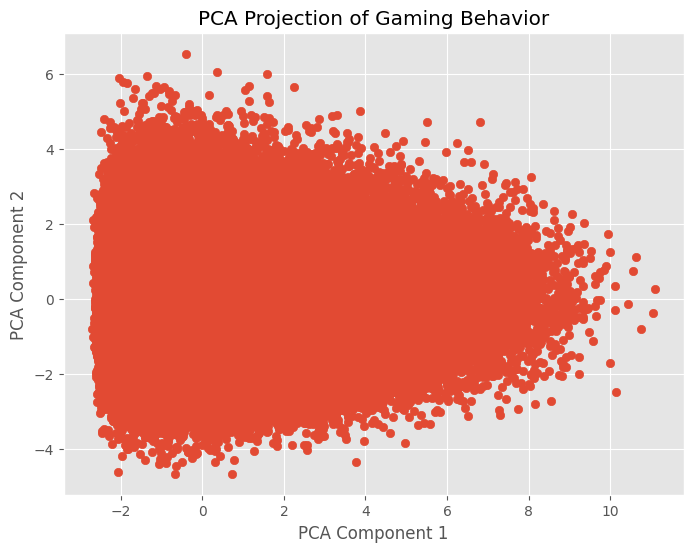

In [22]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = df.select_dtypes(include=np.number)

scaled = StandardScaler().fit_transform(features)
pca = PCA(n_components=2)
components = pca.fit_transform(scaled)

plt.figure(figsize=(8,6))
plt.scatter(components[:,0], components[:,1])
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("PCA Projection of Gaming Behavior")
plt.show()

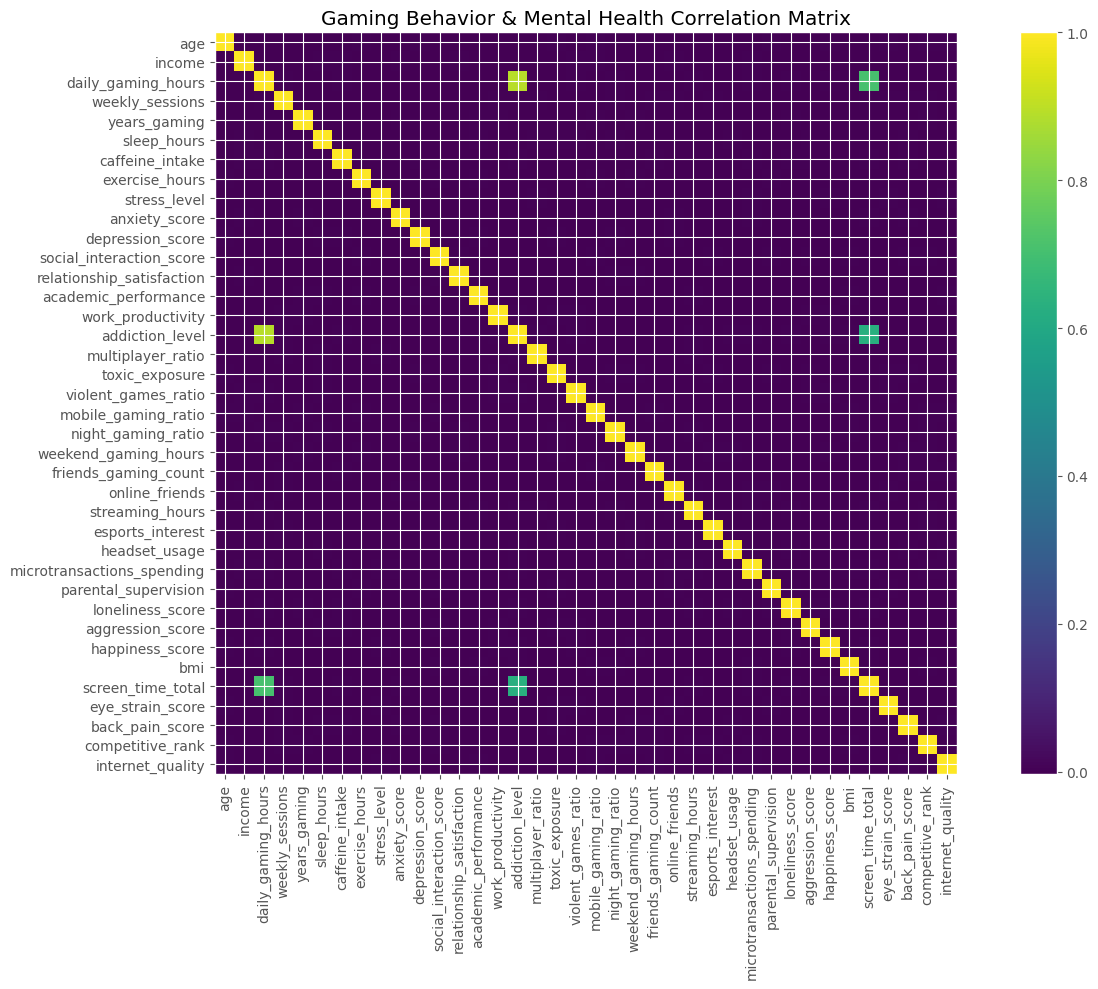

In [23]:
corr = df.select_dtypes(include=np.number).corr()

plt.figure(figsize=(14,10))
im = plt.imshow(corr)
plt.colorbar(im)

plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.columns)), corr.columns)

plt.title("Gaming Behavior & Mental Health Correlation Matrix")
plt.tight_layout()
plt.show()

## Feature engg

In [24]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score
)

In [25]:
# Keep only numeric features
X = df.select_dtypes(include=np.number).drop(columns=['addiction_level'])
y = df['addiction_level']

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=120,
    max_depth=12,
    n_jobs=-1,
    random_state=42
)

model.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, n_estimators=120, n_jobs=-1,
                      random_state=42)

In [26]:
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("===== MODEL PERFORMANCE =====")
print("MAE  :", round(mae, 4))
print("RMSE :", round(rmse, 4))
print("R2   :", round(r2, 4))

===== MODEL PERFORMANCE =====
MAE  : 0.7586
RMSE : 0.9457
R2   : 0.7999


In [27]:
cv_scores = cross_val_score(
    model,
    X,
    y,
    cv=5,
    scoring="r2"
)

print("Cross Validation R2 Scores:", cv_scores)
print("Average CV R2:", cv_scores.mean())

Cross Validation R2 Scores: [0.79997421 0.79891836 0.79941009 0.79876152 0.79971171]
Average CV R2: 0.7993551802069667


In [28]:
results = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred
})

fig = px.scatter(
    results.sample(min(15000, len(results))),
    x="Actual",
    y="Predicted",
    opacity=0.5,
    title="Actual vs Predicted Addiction Level",
    template="plotly_white"
)

fig.add_shape(
    type="line",
    x0=results["Actual"].min(),
    y0=results["Actual"].min(),
    x1=results["Actual"].max(),
    y1=results["Actual"].max(),
)

fig.show()

In [29]:
importance = pd.DataFrame({
    "Feature": X.columns,
    "Importance": model.feature_importances_
}).sort_values(by="Importance", ascending=False)

fig = px.bar(
    importance.head(20),
    x="Importance",
    y="Feature",
    orientation="h",
    title="Top 20 Features Affecting Addiction Level",
    template="plotly_white"
)

fig.show()

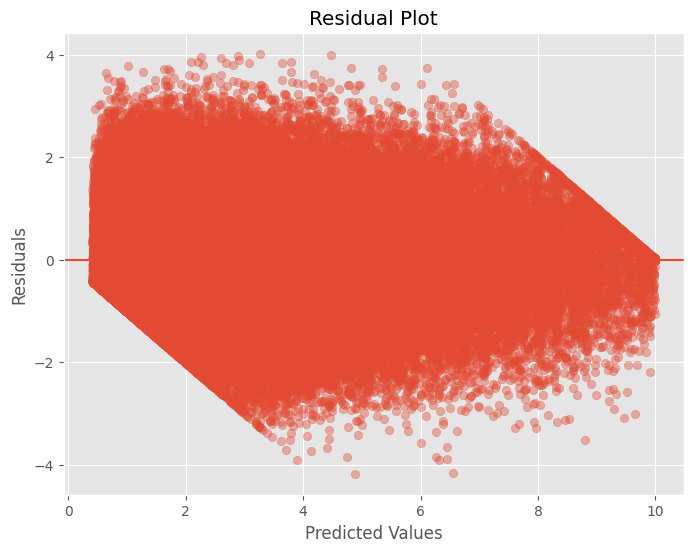

In [30]:
residuals = y_test - y_pred

plt.figure(figsize=(8,6))
plt.scatter(y_pred, residuals, alpha=0.4)
plt.axhline(0)
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot")
plt.show()

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=120, max_depth=12, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    print(name, "R2:", r2_score(y_test, preds))

Linear Regression R2: 0.7941583409287116
Random Forest R2: 0.7998574183345993
Gradient Boosting R2: 0.8000749217990103


## Thank you..pls upvote!!!!!!!